## Первая попытка

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

sns.set(rc={'figure.figsize':(20,20)})

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)

In [2]:
diabetes_df = pd.read_csv(os.path.join(parent_dir, 'datasets', 'pima-indians-diabetes-prediction', 'diabetes.csv'))
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# cols = diabetes_df.columns.to_list()
# diabetes_df[cols[1:6]] = diabetes_df[cols[1:6]].replace(0, np.NaN)

In [4]:
# проверка на нули и NaN-ы
for i in diabetes_df.columns:
    if diabetes_df[i].isnull().values.any():
        print(i)
        # diabetes_df = diabetes_df[diabetes_df[i].notna()]
        diabetes_df[i].fillna(diabetes_df[i].mean(), axis=0, inplace=True)

In [5]:
# разделение на train и test
train, test = np.split(diabetes_df.sample(frac=1), [int(0.8*len(diabetes_df))])

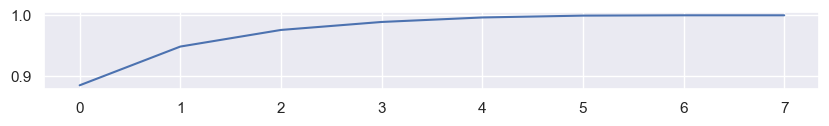

In [6]:
# количество признаков, необходимых для описания дисперсии данных
sample = train.drop('Outcome', axis=1)
pca_sample = PCA()
sample = pca_sample.fit_transform(sample)
plt.figure(figsize=(10,1))
plt.plot(np.cumsum(pca_sample.explained_variance_ratio_))

In [7]:
# StandardScaler и PCA
def preprocessing(df):
    x = df.drop('Outcome', axis=1)
    y = df['Outcome']
    sc = StandardScaler()
    x = sc.fit_transform(x)
    # pca = PCA(n_components=5)
    # x = pca.fit_transform(x)
    return x, y

In [8]:
# обучение моделей
X_train, Y_train = preprocessing(train)
X_test, Y_test = preprocessing(test)

model_0 = KNeighborsClassifier()
model_0.fit(X_train, Y_train)

model_1 = LogisticRegression()
model_1.fit(X_train, Y_train)

model_2 = GaussianNB()
model_2.fit(X_train, Y_train)

model_3 = SVC()
model_3.fit(X_train, Y_train)

model_4 = DecisionTreeClassifier()
model_4.fit(X_train, Y_train)

DecisionTreeClassifier()

In [9]:
# тестирование моделей
print(
    f'Точность {model_0} составляет {accuracy_score(Y_test, model_0.predict(X_test))}\n'
    f'Точность {model_1} составляет {accuracy_score(Y_test, model_1.predict(X_test))}\n'
    f'Точность {model_2} составляет {accuracy_score(Y_test, model_2.predict(X_test))}\n'
    f'Точность {model_3} составляет {accuracy_score(Y_test, model_3.predict(X_test))}\n'
    f'Точность {model_4} составляет {accuracy_score(Y_test, model_4.predict(X_test))}'
)

Точность KNeighborsClassifier() составляет 0.7077922077922078
Точность LogisticRegression() составляет 0.7272727272727273
Точность GaussianNB() составляет 0.7467532467532467
Точность SVC() составляет 0.7597402597402597
Точность DecisionTreeClassifier() составляет 0.7207792207792207


## Вторая попытка (попытка от ChatGPT)

In [10]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)

In [11]:
dataset = pd.read_csv(os.path.join(parent_dir, 'datasets', 'pima-indians-diabetes-prediction', 'diabetes.csv'))
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
X = dataset.iloc[:, 0:8]
Y = dataset.iloc[:, 8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [13]:
clf_random_forest = RandomForestClassifier(n_estimators=100)
clf_random_forest.fit(X_train, Y_train)
print(
    f'Точность {clf_random_forest} составляет {accuracy_score(Y_test, clf_random_forest.predict(X_test))}'
)

clf_logistic_regression = LogisticRegression(max_iter=1000)
clf_logistic_regression.fit(X_train, Y_train)
print(
    f'Точность {clf_logistic_regression} составляет {accuracy_score(Y_test, clf_logistic_regression.predict(X_test))}'
)

Точность RandomForestClassifier() составляет 0.75
Точность LogisticRegression(max_iter=1000) составляет 0.7239583333333334


## Третья попытка

In [14]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(rc={'figure.figsize':(7,7)})

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)

In [15]:
diabetes_df = pd.read_csv(os.path.join(parent_dir, 'datasets', 'pima-indians-diabetes-prediction', 'diabetes.csv'))
cols = diabetes_df.columns.to_list()
cols = cols[-1:] + cols[:-1]
diabetes_df = diabetes_df[cols]
diabetes_df

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,0,10,101,76,48,180,32.9,0.171,63
764,0,2,122,70,27,0,36.8,0.340,27
765,0,5,121,72,23,112,26.2,0.245,30
766,1,1,126,60,0,0,30.1,0.349,47


In [16]:
diabetes_df.loc[:, 'Feature1'] = 1
diabetes_df.loc[(diabetes_df['Age'] <= 30) & (diabetes_df['Glucose'] <= 120), 'Feature1'] = 0

diabetes_df.loc[:, 'Feature2'] = 1
diabetes_df.loc[(diabetes_df['Glucose'] <= 105) & (diabetes_df['BloodPressure'] <= 80), 'Feature2'] = 0

diabetes_df.loc[:, 'Feature3'] = 1
diabetes_df.loc[diabetes_df['BMI'] <= 30, 'Feature3'] = 0

diabetes_df.loc[:, 'Feature4'] = 1
diabetes_df.loc[(diabetes_df['Age'] <= 30) & (diabetes_df['Pregnancies'] <= 6), 'Feature4'] = 0

diabetes_df.loc[:, 'Feature5'] = 1
diabetes_df.loc[diabetes_df['SkinThickness'] <= 20, 'Feature5'] = 0

diabetes_df.loc[:, 'Feature6'] = 1
diabetes_df.loc[(diabetes_df['BMI'] <= 30) & (diabetes_df['SkinThickness'] <= 20), 'Feature6'] = 0

diabetes_df.loc[:, 'Feature7'] = 1
diabetes_df.loc[(diabetes_df['Glucose'] <= 105) & (diabetes_df['BMI'] <= 30), 'Feature7'] = 0

diabetes_df.loc[:, 'Feature8'] = 1
diabetes_df.loc[diabetes_df['Insulin'] <= 200, 'Feature8'] = 0

diabetes_df.loc[:, 'Feature9'] = 1
diabetes_df.loc[diabetes_df['BloodPressure'] <= 80, 'Feature9'] = 0

diabetes_df

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9
0,1,6,148,72,35,0,33.6,0.627,50,1,1,1,1,1,1,1,0,0
1,0,1,85,66,29,0,26.6,0.351,31,1,0,0,1,1,1,0,0,0
2,1,8,183,64,0,0,23.3,0.672,32,1,1,0,1,0,0,1,0,0
3,0,1,89,66,23,94,28.1,0.167,21,0,0,0,0,1,1,0,0,0
4,1,0,137,40,35,168,43.1,2.288,33,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,10,101,76,48,180,32.9,0.171,63,1,0,1,1,1,1,1,0,0
764,0,2,122,70,27,0,36.8,0.340,27,1,1,1,0,1,1,1,0,0
765,0,5,121,72,23,112,26.2,0.245,30,1,1,0,0,1,1,1,0,0
766,1,1,126,60,0,0,30.1,0.349,47,1,1,1,1,0,1,1,0,0


In [17]:
cols = diabetes_df.columns.to_list()
cols = cols[1:] + cols[:1]
diabetes_df = diabetes_df[cols]
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Outcome
0,6,148,72,35,0,33.6,0.627,50,1,1,1,1,1,1,1,0,0,1
1,1,85,66,29,0,26.6,0.351,31,1,0,0,1,1,1,0,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1,0,1,0,0,1,0,0,1
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0,1,1,0,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1,0,1,1,1,1,1,0,0,0
764,2,122,70,27,0,36.8,0.340,27,1,1,1,0,1,1,1,0,0,0
765,5,121,72,23,112,26.2,0.245,30,1,1,0,0,1,1,1,0,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1,1,1,0,1,1,0,0,1


In [18]:
X = diabetes_df.iloc[:, :17]
Y = diabetes_df.iloc[:, 17]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
estimator = lgb.LGBMClassifier(learning_rate=0.4, metric='f1', n_estimators=570, num_leaves=50)
estimator.fit(X_train, Y_train)
print(
    f'Точность {estimator} составляет {accuracy_score(Y_test, estimator.predict(X_test))}'
)

Точность LGBMClassifier(learning_rate=0.4, metric='f1', n_estimators=570, num_leaves=50) составляет 0.7760416666666666


In [20]:
param_grid = {
    'n_estimators': [i for i in range(10,700,10)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2, 0.3, 0.4, 0.5]
}
random_search = RandomizedSearchCV(estimator, param_grid)

random_search.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], eval_metric=['auc'], early_stopping_rounds=5)

print(random_search.best_params_)

[1]	valid_0's auc: 0.784376
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.803818
[3]	valid_0's auc: 0.798044
[4]	valid_0's auc: 0.799163
[5]	valid_0's auc: 0.796336
[6]	valid_0's auc: 0.80588
[7]	valid_0's auc: 0.806881
[8]	valid_0's auc: 0.810475
[9]	valid_0's auc: 0.812772
[10]	valid_0's auc: 0.814363
[11]	valid_0's auc: 0.81725
[12]	valid_0's auc: 0.821315
[13]	valid_0's auc: 0.822022
[14]	valid_0's auc: 0.825085
[15]	valid_0's auc: 0.828561
[16]	valid_0's auc: 0.830093
[17]	valid_0's auc: 0.828915
[18]	valid_0's auc: 0.827972
[19]	valid_0's auc: 0.829033
[20]	valid_0's auc: 0.82703
[21]	valid_0's auc: 0.825969
Early stopping, best iteration is:
[16]	valid_0's auc: 0.830093
[1]	valid_0's auc: 0.757099
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.778956
[3]	valid_0's auc: 0.781548
[4]	valid_0's auc: 0.784965
[5]	valid_0's auc: 0.785554
[6]	valid_0's auc: 0.785024
[7]	valid_0's auc: 0.785142
[8]	valid_0's auc: 0.78

In [21]:
estimator = lgb.LGBMClassifier(learning_rate=random_search.best_params_['learning_rate'],
                               metric='f1',
                               n_estimators=random_search.best_params_['n_estimators'],
                               num_leaves=50)
estimator_scores = cross_val_score(estimator, X, Y, scoring='f1', cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(estimator_scores)

Scores: [0.5862069  0.5        0.60714286 0.56666667 0.47619048 0.61818182
 0.64       0.72727273 0.53061224 0.66666667]
Mean: 0.5918940353570895
Standard deviation: 0.07308361198135262


## Четвёртая попытка

In [22]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)

In [23]:
data = pd.read_csv(os.path.join(parent_dir, 'datasets', 'pima-indians-diabetes-prediction', 'diabetes.csv'))
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
    data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

<Axes: >

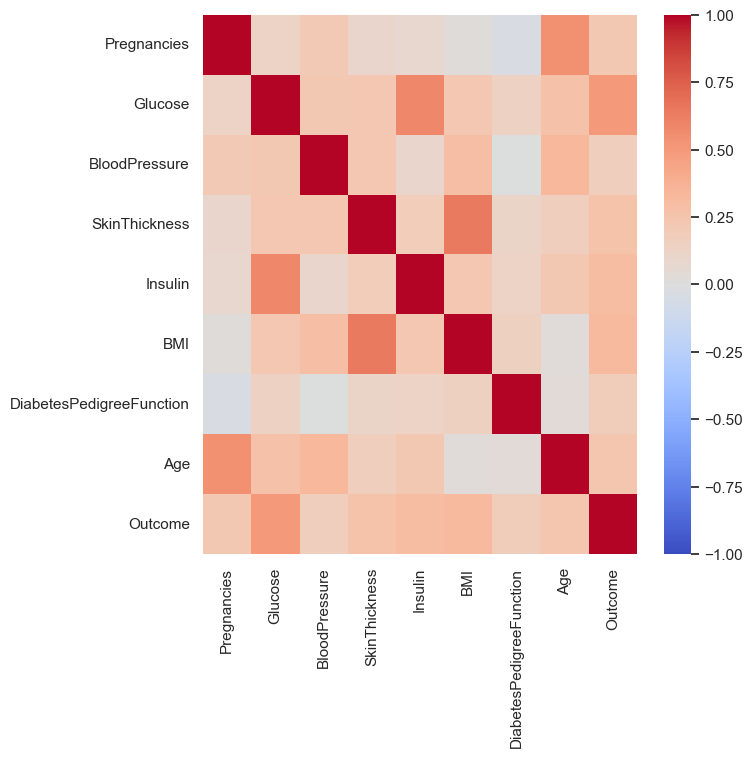

In [25]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm')

In [26]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median_value = median_target(i)
    print(median_value)
    data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = median_value[i][0]
    data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = median_value[i][1]

   Outcome  Glucose
0        0    107.0
1        1    140.0
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome   BMI
0        0  30.1
1        1  34.3


In [27]:
'''
data['N0'] = data['BMI'] * data['SkinThickness']

data.loc[:,'N1'] = 0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1'] = 1

data.loc[:,'N2'] = 0
data.loc[(data['BMI']<=30),'N2'] = 1

data.loc[:,'N3'] = 0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'N3'] = 1

data.loc[:,'N4'] = 0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4'] = 1

data.loc[:,'N5'] = 0
data.loc[(data['SkinThickness']<=20) ,'N5'] = 1

data.loc[:,'N6'] = 0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'N6'] = 1

data.loc[:,'N7'] = 0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'N7'] = 1

data['N8'] =  data['Pregnancies'] / data['Age']

data.loc[:,'N9'] = 0
data.loc[(data['Insulin']<200),'N9'] = 1

data.loc[:,'N10'] = 0
data.loc[(data['BloodPressure']<80),'N10'] = 1

data.loc[:,'N11'] = 0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'N11'] = 1

data['N12'] = data['Age'] * data['DiabetesPedigreeFunction']

data['N13'] = data['Glucose'] / data['DiabetesPedigreeFunction']

data['N14'] = data['Age'] / data['Insulin']

data.loc[:,'N15'] = 0
data.loc[(data['N0']<1034) ,'N15'] = 1
'''

"\ndata['N0'] = data['BMI'] * data['SkinThickness']\n\ndata.loc[:,'N1'] = 0\ndata.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1'] = 1\n\ndata.loc[:,'N2'] = 0\ndata.loc[(data['BMI']<=30),'N2'] = 1\n\ndata.loc[:,'N3'] = 0\ndata.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'N3'] = 1\n\ndata.loc[:,'N4'] = 0\ndata.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4'] = 1\n\ndata.loc[:,'N5'] = 0\ndata.loc[(data['SkinThickness']<=20) ,'N5'] = 1\n\ndata.loc[:,'N6'] = 0\ndata.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'N6'] = 1\n\ndata.loc[:,'N7'] = 0\ndata.loc[(data['Glucose']<=105) & (data['BMI']<=30),'N7'] = 1\n\ndata['N8'] =  data['Pregnancies'] / data['Age']\n\ndata.loc[:,'N9'] = 0\ndata.loc[(data['Insulin']<200),'N9'] = 1\n\ndata.loc[:,'N10'] = 0\ndata.loc[(data['BloodPressure']<80),'N10'] = 1\n\ndata.loc[:,'N11'] = 0\ndata.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'N11'] = 1\n\ndata['N12'] = data['Age'] * data['DiabetesPedigreeFunction']\n\ndata['N

<Axes: >

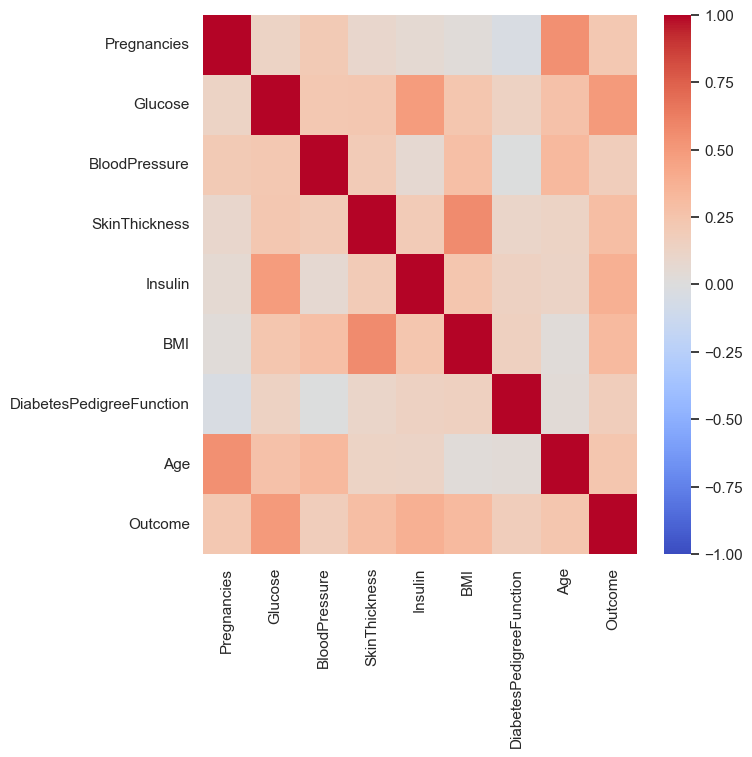

In [28]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm')

In [29]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)
data_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84.0,70.0,27.0,102.5,30.1,0.304,21,0
618,9,112.0,82.0,24.0,169.5,28.2,1.282,50,1
346,1,139.0,46.0,19.0,83.0,28.7,0.654,22,0
294,0,161.0,50.0,27.0,102.5,21.9,0.254,65,0
231,6,134.0,80.0,37.0,370.0,46.2,0.238,46,1
...,...,...,...,...,...,...,...,...,...
71,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
106,1,96.0,122.0,27.0,102.5,22.4,0.207,27,0
270,10,101.0,86.0,37.0,169.5,45.6,1.136,38,1
435,0,141.0,74.5,32.0,169.5,42.4,0.205,29,1


In [30]:
# StandardScaler
def preprocessing(df):
    x = df.drop('Outcome', axis=1)
    y = df['Outcome']
    sc = StandardScaler()
    sc.fit_transform(x)
    #pca = PCA(n_components=8)
    #x = pca.fit_transform(x)
    return x, y

X_train, Y_train = preprocessing(data_train)
X_test, Y_test = preprocessing(data_test)

In [31]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, Y_train)
data_test_pred = random_forest_model.predict(X_test)
random_forest_model_accuracy = accuracy_score(Y_test, data_test_pred) * 100
random_forest_model_f1 = f1_score(Y_test, data_test_pred) * 100
print(f'Accuracy = {random_forest_model_accuracy} %')
print(f'F1 Score = {random_forest_model_f1} %')

Accuracy = 88.31168831168831 %
F1 Score = 84.21052631578948 %
